In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow


In [ ]:
# fashion_mnist là một tập dữ liệu về các hình ảnh của zalando- gồm 60000 ảnh được dùng để tập huấn và 10000 ảnh thường dùng để đánh giá khả năng phân loại nhận diện ảnh của mạng neron. Mỗi ảnh là một mảng numpy 2 chiều 28*28 với mỗi pixel có giá trị từ 0 đến 255.
# nhãn là một mảng các số nguyên từ 0-9 tương ứng với mỗi lớp quần áo giày dép

In [2]:
x = pd.read_csv("./data/fashion-mnist_train.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape, y.shape)

(60000, 784) (60000,)


In [3]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [4]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [5]:
import matplotlib.pyplot as plt

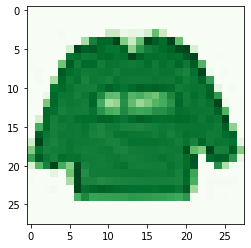

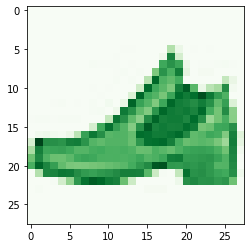

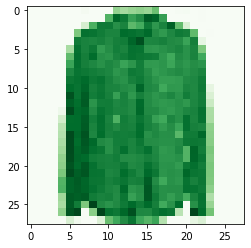

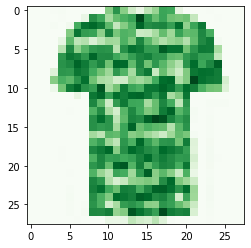

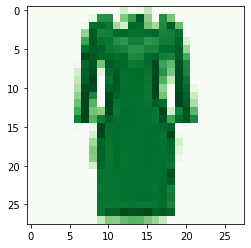

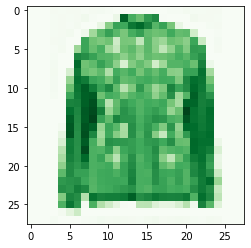

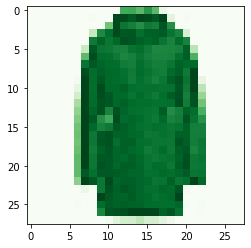

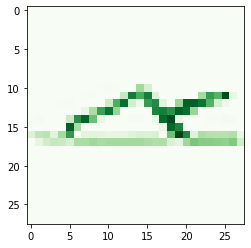

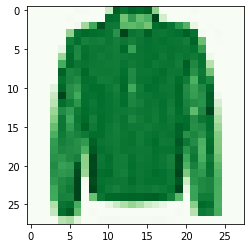

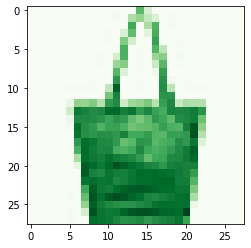

In [6]:
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28),cmap="Greens")
    plt.show()

In [7]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation = 'relu'))
model.add(Convolution2D(8,(5,5),activation = 'relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           6408      
                                                        

In [8]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [9]:
history = model.fit(X_train,Y_train,epochs= 200,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/200
188/188 [==============================] - 148s 778ms/step - loss: 0.8404 - accuracy: 0.6930 - val_loss: 0.6099 - val_accuracy: 0.7835
Epoch 2/200
188/188 [==============================] - 148s 785ms/step - loss: 0.5003 - accuracy: 0.8181 - val_loss: 0.4814 - val_accuracy: 0.8413
Epoch 3/200
188/188 [==============================] - 146s 779ms/step - loss: 0.4219 - accuracy: 0.8504 - val_loss: 0.4353 - val_accuracy: 0.8523
Epoch 4/200
188/188 [==============================] - 161s 856ms/step - loss: 0.3771 - accuracy: 0.8670 - val_loss: 0.3851 - val_accuracy: 0.8712
Epoch 5/200
188/188 [==============================] - 147s 780ms/step - loss: 0.3442 - accuracy: 0.8794 - val_loss: 0.3770 - val_accuracy: 0.8748
Epoch 6/200
188/188 [==============================] - 146s 775ms/step - loss: 0.3226 - accuracy: 0.8849 - val_loss: 0.3368 - val_accuracy: 0.8852
Epoch 7/200
188/188 [==============================] - 147s 781ms/step - loss: 0.3079 - accuracy: 0.8897 - val_loss: 0

188/188 [==============================] - 155s 823ms/step - loss: 0.0382 - accuracy: 0.9858 - val_loss: 0.4687 - val_accuracy: 0.9118
Epoch 112/200
188/188 [==============================] - 148s 789ms/step - loss: 0.0374 - accuracy: 0.9855 - val_loss: 0.4617 - val_accuracy: 0.9102
Epoch 113/200
188/188 [==============================] - 150s 797ms/step - loss: 0.0426 - accuracy: 0.9837 - val_loss: 0.4525 - val_accuracy: 0.9122
Epoch 114/200
188/188 [==============================] - 170s 904ms/step - loss: 0.0380 - accuracy: 0.9862 - val_loss: 0.4579 - val_accuracy: 0.9118
Epoch 115/200
188/188 [==============================] - 149s 793ms/step - loss: 0.0357 - accuracy: 0.9865 - val_loss: 0.4742 - val_accuracy: 0.9122
Epoch 116/200
188/188 [==============================] - 151s 801ms/step - loss: 0.0351 - accuracy: 0.9867 - val_loss: 0.4609 - val_accuracy: 0.9132
Epoch 117/200
188/188 [==============================] - 144s 766ms/step - loss: 0.0383 - accuracy: 0.9858 - val_loss: 0

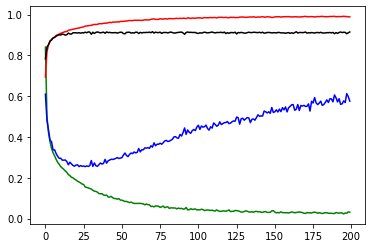

In [25]:
plt.figure(0)
plt.plot(history.history['loss'],'g')
plt.plot(history.history['val_loss'],'b')

plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'black')
plt.show()

In [ ]:
plt.figure(0)
plt.plot(history.history['loss'],'g')
plt.plot(history.history['val_loss'],'b')

plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'black')
plt.show()
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)